1. Import all required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Removes a warning later on
warnings.filterwarnings('ignore')

2. Read the csv file and if you experience ‘unicodedecodeerror’ then set the second parameter in read_csv method to ‘encoding=iso-8859-1’

In [3]:
fires = pd.read_csv("amazon.csv")

3. Check data type of each column

a. Find what the type of the ‘date’ column is

In [4]:
fires.date.dtype

dtype('O')

b. If it is of ‘object’ type, we need to convert the type into datetime

c. For conversion you need to make changes again in the read_csv
method, put third parameter into it for parsing dates 

In [5]:
fires = pd.read_csv("amazon.csv", parse_dates = ["date"])

d. Please check after making changes what is the data type of date
column is (it should be datetime)

In [6]:
fires.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [7]:
# Cast number to an int, since partial fires don't make much sense.
fires["number"] = fires["number"].astype("int64")
fires.dtypes

year               int64
state             object
month             object
number             int64
date      datetime64[ns]
dtype: object

4. Display top 5 rows of the dataset.

In [8]:
fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


5. Check the last 5 rows.

In [9]:
fires.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


6. Find the shape of our dataset (number of rows and number of columns).

a. Print the number of rows and columns separately

In [10]:
print(f"There are {fires.shape[0]} rows.")
print(f"There are {fires.shape[1]} columns.")

There are 6454 rows.
There are 5 columns.


7. Getting information about our dataset like total number rows, total number of columns, datatypes of each column and memory requirement.

In [11]:
fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   int64         
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 252.2+ KB


8. Check for duplicated data and drop it.

a. Can use duplicated()

In [12]:
duplicates = fires.duplicated()
duplicates.value_counts()

False    6421
True       33
dtype: int64

b. Please mention how many duplicate values are removed

In [13]:
# The 33 True values from above are removed
fires = fires[~duplicates]
len(fires)

6421

9. Check null values in the dataset.

In [14]:
fires.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

10. Get overall statistics about the data frame.

a. Here you will find that you are getting only numeric columns

In [15]:
fires.describe()

,year,number
count,6421.000000,6421.000000
mean,2007.490734,108.773867
std,5.732222,191.184606
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,114.000000
max,2017.000000,998.000000


b. Show categorical columns as well, if you get a warning,
 add extra parameters in the method.

In [16]:
fires.state.value_counts()

Rio                 696
Mato Grosso         473
Paraiba             472
Acre                239
Par�                239
Sergipe             239
Sao Paulo           239
Santa Catarina      239
Roraima             239
Rondonia            239
Piau                239
Pernambuco          239
Minas Gerais        239
Alagoas             239
Maranhao            239
Goias               239
Espirito Santo      239
Distrito Federal    239
Ceara               239
Bahia               239
Amazonas            239
Amapa               239
Tocantins           239
Name: state, dtype: int64

In [17]:
# Got rid of �, resulting from "á"
fires["state"] = fires["state"].replace({"Par�": "Para"})
fires.state.value_counts()

Rio                 696
Mato Grosso         473
Paraiba             472
Acre                239
Para                239
Sergipe             239
Sao Paulo           239
Santa Catarina      239
Roraima             239
Rondonia            239
Piau                239
Pernambuco          239
Minas Gerais        239
Alagoas             239
Maranhao            239
Goias               239
Espirito Santo      239
Distrito Federal    239
Ceara               239
Bahia               239
Amazonas            239
Amapa               239
Tocantins           239
Name: state, dtype: int64

In [18]:
fires.month.value_counts()

Setembro     540
Outubro      540
Novembro     540
Junho        539
Julho        539
Agosto       539
Janeiro      535
Fevereiro    535
Mar�o        534
Abril        534
Maio         533
Dezembro     513
Name: month, dtype: int64

11. Rename month names to English.

In [19]:
# Got rid of �, resulting from "ç"
fires["month"] = fires["month"].replace({"Janeiro": "January", "Fevereiro": "February", "Mar�o": "March", "Abril": "April", "Maio": "May", "Junho": "June", 
                      "Julho": "July", "Agosto": "August", "Setembro": "September", "Outubro": "October", "Novembro": "November", "Dezembro": "December"})
fires.month.value_counts()

September    540
October      540
November     540
June         539
July         539
August       539
January      535
February     535
March        534
April        534
May          533
December     513
Name: month, dtype: int64

12. Total number of fires registered.

In [20]:
fires["number"].sum()

698437

13. In which month was the maximum number of forest fires reported?

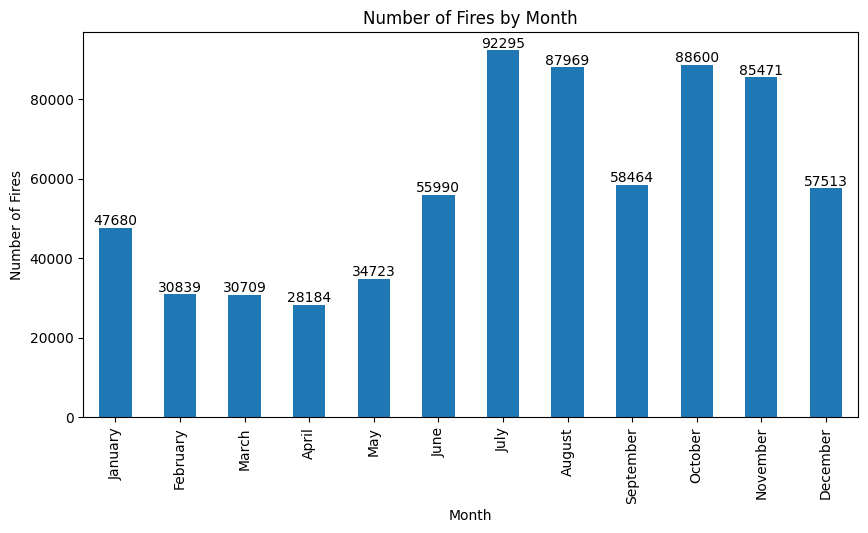

In [21]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
fires["month"] = pd.Categorical(fires["month"], categories = month_order, ordered = True)

fires_monthly = fires.sort_values("month")
fires_monthly = fires_monthly.groupby("month")["number"].sum()

month_fire_plot = fires_monthly.plot(kind = "bar", figsize = (10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Month")
for bar in month_fire_plot.containers:
    month_fire_plot.bar_label(bar)
plt.show()

In [22]:
# July has the most reported fires at 92,295.
# Fires seem to happen the most in the second half of the year. Specifically July-August and October-November see drastically more fires.
# There are relatively little fires from February to May.

14. In which year was the maximum number of forest fires reported?

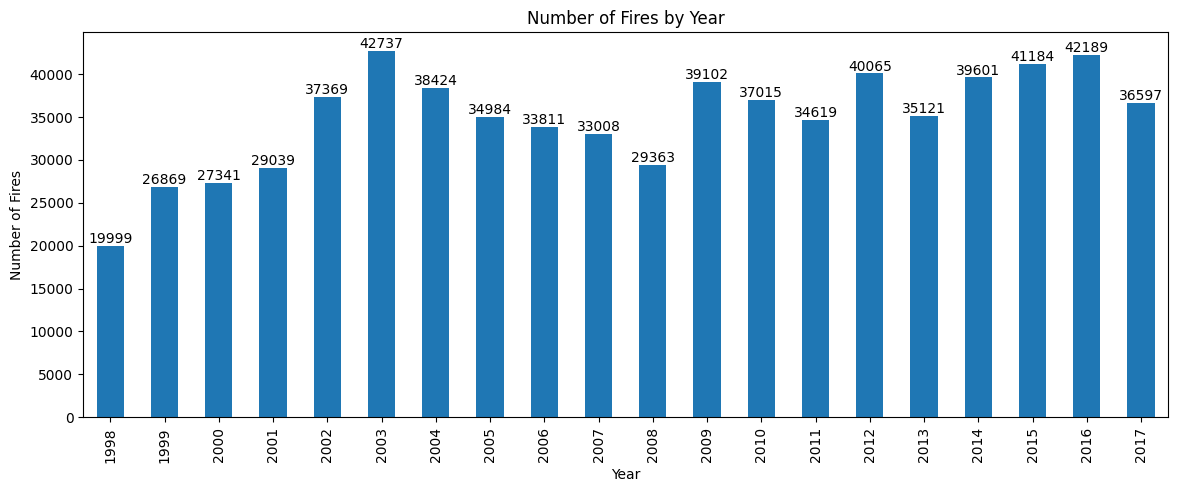

In [23]:
fires_yearly = fires.sort_values("year")
fires_yearly = fires_yearly.groupby("year")["number"].sum()

year_fire_plot = fires_yearly.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Year")
for bar in year_fire_plot.containers:
    year_fire_plot.bar_label(bar)
plt.show()

In [24]:
# The year with the most fires was 2003 with 42,737.

15. Which state has the maximum number of forest fires reported?

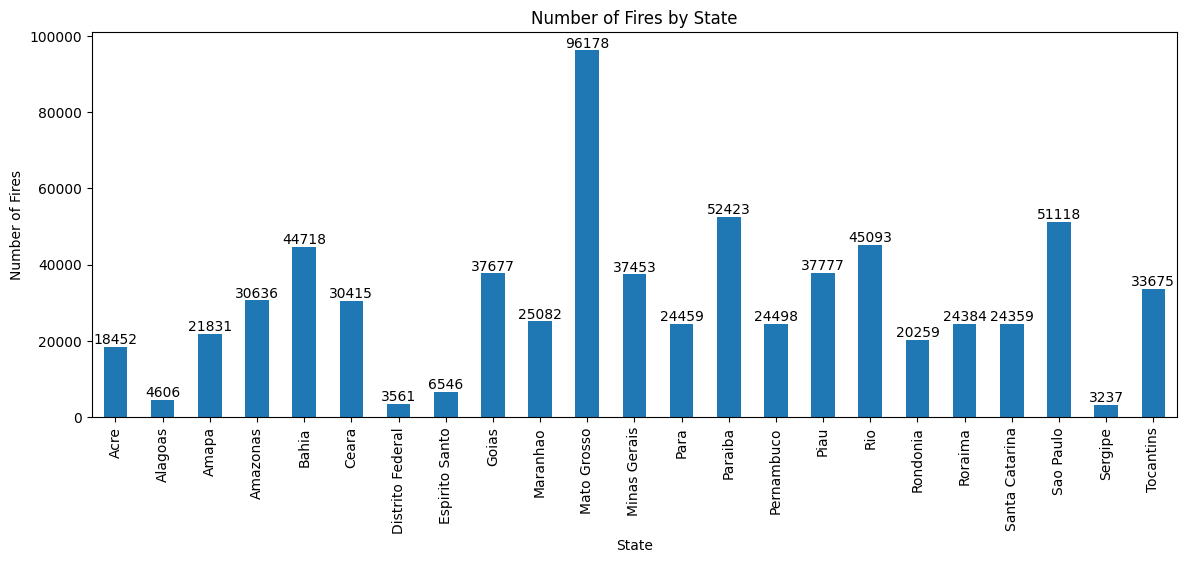

In [25]:
fires_stately = fires.sort_values("state")
fires_stately = fires_stately.groupby("state")["number"].sum()

state_fire_plot = fires_stately.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("State")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by State")
for bar in state_fire_plot.containers:
    state_fire_plot.bar_label(bar)
plt.show()

In [26]:
# Mato Grosso has had the most fires at 96,178

16. Find total number of fires that were reported in amazonas (state in brazil)

In [27]:
print(f"There were {fires_stately['Amazonas']} total fires reported in Amazonas.")

There were 30636 total fires reported in Amazonas.


17. Display the number of fires that were reported in amazonas (year-wise)

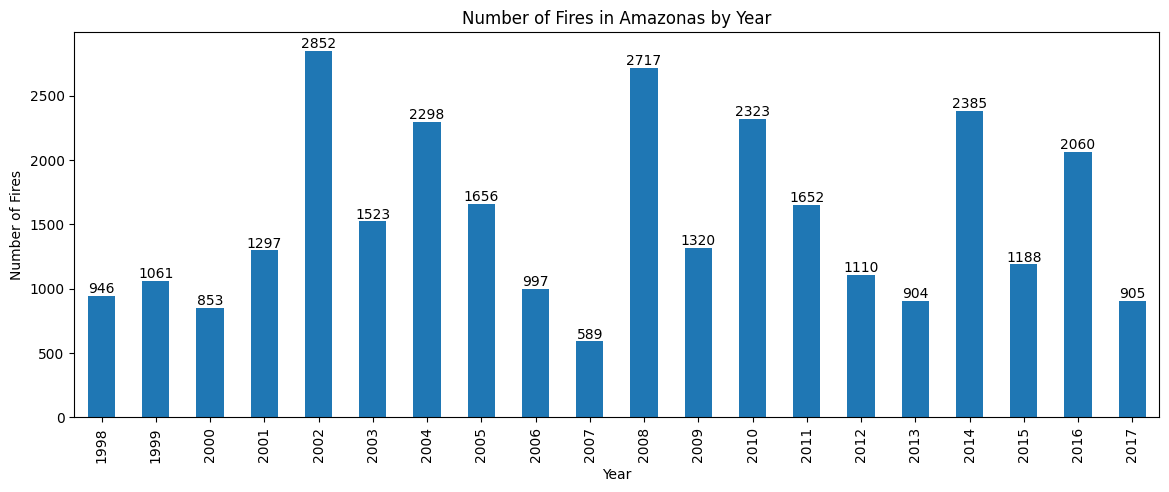

In [28]:
amazonas_yearly = fires[fires["state"] == "Amazonas"].sort_values("year")
amazonas_yearly = amazonas_yearly.groupby("year")["number"].sum()

amazonas_year_fire_plot = amazonas_yearly.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.title("Number of Fires in Amazonas by Year")
for bar in amazonas_year_fire_plot.containers:
    amazonas_year_fire_plot.bar_label(bar)
plt.show()

In [29]:
# Amazonas had the most fires in 2002 at 2,852. It had the least in 2007 at 589.

18. Display the number of fires that were reported in amazonas (day-wise)

a. Visualize the result using the weekdays name

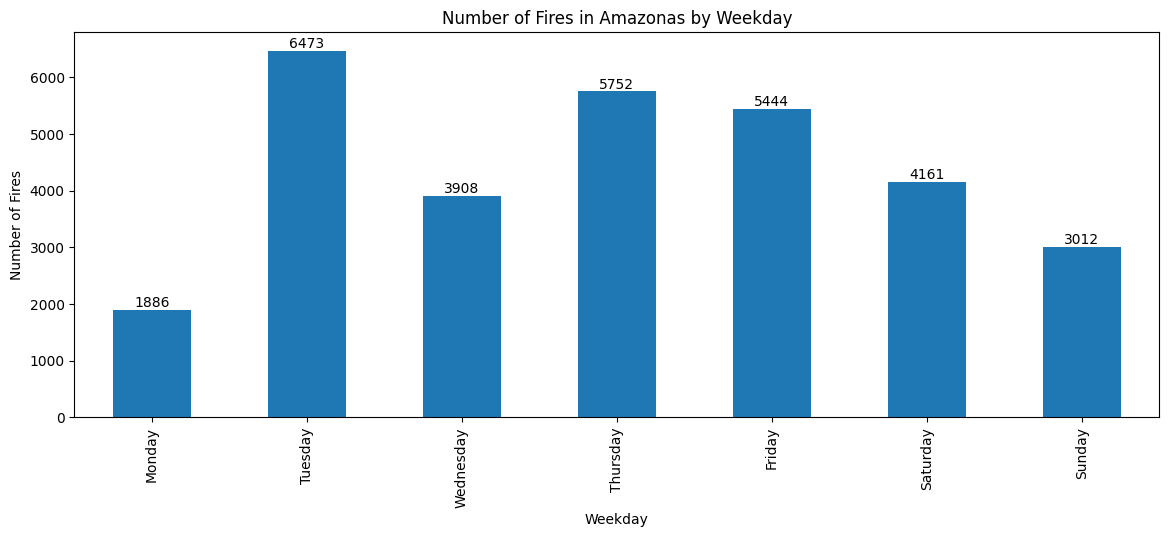

In [30]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

amazonas_daily = fires[fires["state"] == "Amazonas"]
amazonas_daily["weekday"] = amazonas_daily["date"].dt.weekday
amazonas_daily["weekday"] = amazonas_daily["weekday"].map(lambda x: weekday_names[x])
amazonas_daily["weekday"] = pd.Categorical(amazonas_daily["weekday"], categories = weekday_names, ordered = True)
amazonas_daily = amazonas_daily.groupby("weekday")["number"].sum()

amazonas_day_fire_plot = amazonas_daily.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("Weekday")
plt.ylabel("Number of Fires")
plt.title("Number of Fires in Amazonas by Weekday")
for bar in amazonas_day_fire_plot.containers:
    amazonas_day_fire_plot.bar_label(bar)
plt.show()

In [31]:
# I don't think this shows anything realistic, it seems like every date was 01/01/YEAR

19. Find the total number of fires reported in 2015 and visualize data based on each ‘month’.

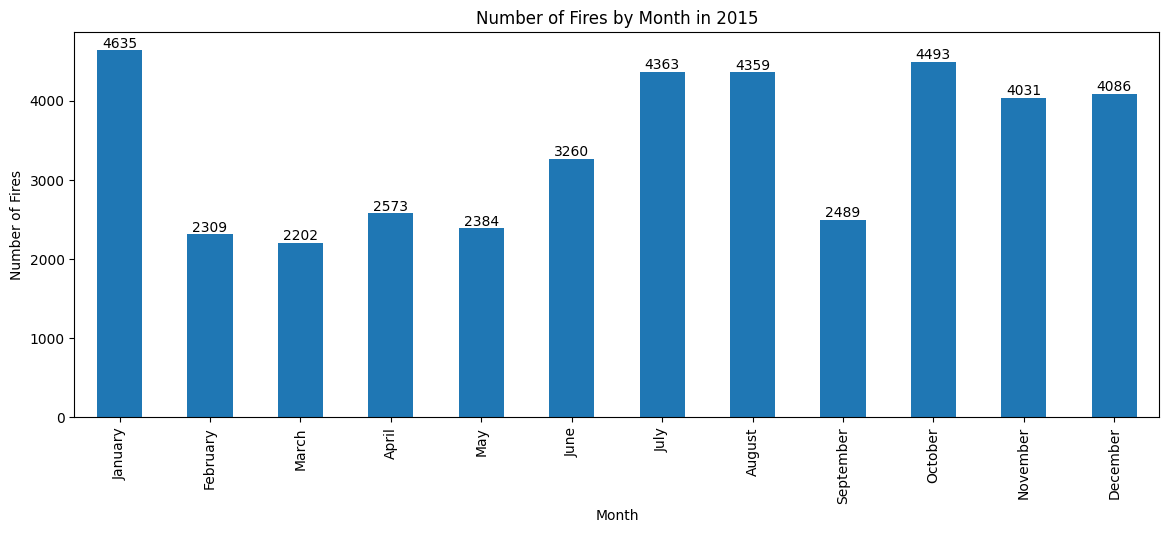

In [32]:
monthly_2015 = fires[fires["year"] == 2015]
monthly_2015 = monthly_2015.groupby("month")["number"].sum()

amazonas_year_fire_plot = monthly_2015.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.title("Number of Fires by Month in 2015")
for bar in amazonas_year_fire_plot.containers:
    amazonas_year_fire_plot.bar_label(bar)
plt.show()

In [33]:
# It looks like the max number of fires reported was in January, then there was a relatively low amount of fires until it started ramping back up in June-December.
# September had relatively low fires compared to the months before/after it.

20. Find the average number of fires reported from highest to lowest
(state-wise).

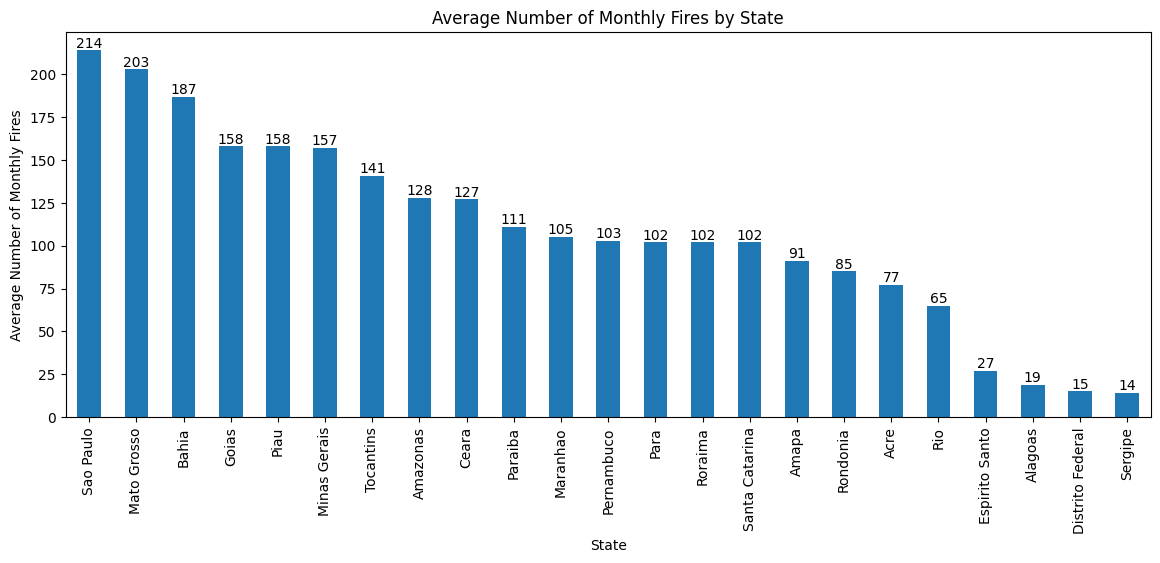

In [34]:
average_state_fires = fires.groupby("state")["number"].mean().round()
average_state_fires = average_state_fires.sort_values(ascending = False)

average_state_fires_plot = average_state_fires.plot(kind = "bar", figsize = (14, 5))
plt.xlabel("State")
plt.ylabel("Average Number of Monthly Fires")
plt.title("Average Number of Monthly Fires by State")
for bar in average_state_fires_plot.containers:
    average_state_fires_plot.bar_label(bar)
plt.show()

In [35]:
# Sao Paulo has the highest average monthly fires at 214. Sergipe has the lowest at 14.

21. Find the state names where fires were reported in December.

In [36]:
december_fires = fires[fires["month"] == "December"]
states_with_december_fires = december_fires["state"].unique()
print(states_with_december_fires)

['Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara' 'Distrito Federal'
 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais' 'Para'
 'Paraiba' 'Pernambuco' 'Piau' 'Rio' 'Rondonia' 'Roraima' 'Santa Catarina'
 'Sao Paulo' 'Sergipe' 'Tocantins']
